In [2]:
import networkx as nx
from node2vec import Node2Vec

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


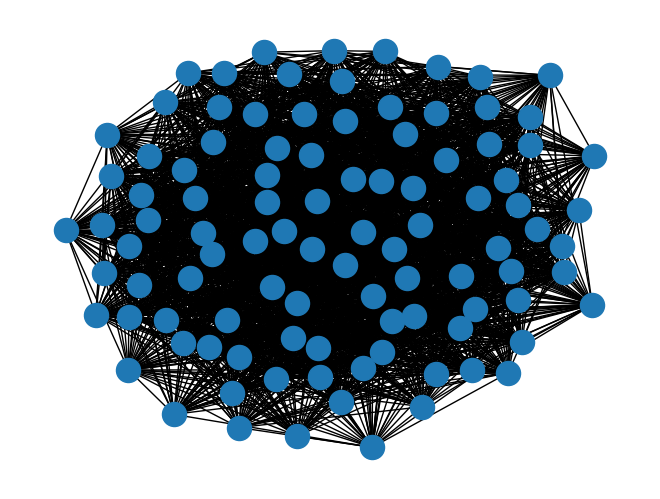

In [3]:
# Create a graph
graph = nx.fast_gnp_random_graph(n=100, p=0.5)
nx.draw(graph, ax=None)

In [4]:
print(graph.nodes)  # 100个节点
print(graph.edges)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
[(0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (0, 11), (0, 15), (0, 16), (0, 17), (0, 19), (0, 21), (0, 22), (0, 25), (0, 27), (0, 31), (0, 33), (0, 34), (0, 35), (0, 37), (0, 39), (0, 42), (0, 45), (0, 46), (0, 48), (0, 50), (0, 51), (0, 54), (0, 55), (0, 56), (0, 58), (0, 59), (0, 60), (0, 61), (0, 62), (0, 64), (0, 65), (0, 69), (0, 70), (0, 71), (0, 72), (0, 73), (0, 74), (0, 77), (0, 78), (0, 80), (0, 82), (0, 83), (0, 86), (0, 87), (0, 88), (0, 90), (0, 92), (0, 94), (1, 3), (1, 6), (1, 9), (1, 13), (1, 14), (1, 15), (1, 23), (1, 25), (1, 28), (1, 29), (1, 31), (1, 37), (1, 38), (1, 40), (1, 4

In [5]:
# Precompute probabilities and generate walks - **ON WINDOWS ONLY WORKS WITH workers=1**
node2vec = Node2Vec(graph,
                    p=1.0,  # Return hyper parameter (default: 1)
                    q=1.0,  # Inout parameter (default: 1)
                    dimensions=64,  # 嵌入维度
                    walk_length=30,  #  Number of nodes in each walk (default: 80)
                    num_walks=200,  # Number of walks per node,即每个节点作为起始节点生成随机游走个数(default: 10)
                    workers=4)
node2vec

Computing transition probabilities:   0%|          | 0/100 [00:00<?, ?it/s]

In [6]:
# Embed nodes
model = node2vec.fit(window=10, min_count=1,
                     batch_words=4)  # Any keywords acceptable by gensim.Word2Vec can be passed, `dimensions` and `workers` are automatically passed (from the Node2Vec constructor)
model

In [7]:
# Get the key's vector, as a 1D numpy array.
model.wv.get_vector('2')  # 节点的embedding表示

array([ 0.10861462,  0.00823352,  0.0393193 ,  0.13690694, -0.05289643,
       -0.0460083 ,  0.04007814,  0.00308341, -0.09958521,  0.08002852,
        0.00125859, -0.09708422,  0.02785652, -0.01830468,  0.09365998,
        0.05882605,  0.19353797, -0.01299402, -0.05744928,  0.250825  ,
       -0.08925091,  0.1010524 ,  0.06143673, -0.13511024, -0.16096216,
        0.05977998, -0.22021876,  0.10491094, -0.12229025,  0.0541938 ,
        0.03509231,  0.07266984, -0.2880539 ,  0.0094517 ,  0.07108832,
       -0.18925115,  0.00186236,  0.03506052,  0.138277  , -0.01794603,
       -0.00961947, -0.00441928, -0.01098016, -0.12531616,  0.11168861,
       -0.27069113,  0.11960848,  0.02090041, -0.06358039,  0.05082386,
        0.07149568, -0.12038883,  0.15453167, -0.0364734 , -0.00915686,
        0.16732222,  0.14858043,  0.11952369,  0.10979012,  0.06851946,
       -0.08966263,  0.0263703 , -0.17695269, -0.17440854], dtype=float32)

In [8]:
'''
topn : int or None, optional
    Number of top-N similar keys to return, when `topn` is int. When `topn` is None,
    then similarities for all keys are returned.
'''
# Look for most similar nodes
model.wv.most_similar('2', topn=10)  # Output node names are always strings

[('40', 0.5872178673744202),
 ('20', 0.5345297455787659),
 ('35', 0.5272442102432251),
 ('16', 0.49704816937446594),
 ('39', 0.4937986731529236),
 ('5', 0.4864099621772766),
 ('94', 0.483650267124176),
 ('58', 0.4773694574832916),
 ('17', 0.45808202028274536),
 ('74', 0.4462605118751526)]

In [10]:
# Compute cosine similarity between two keys.
model.wv.similarity('1', '2')

0.28449303

In [24]:
# Save embeddings for later use
model.wv.save_word2vec_format('graph_64.txt')

In [25]:
# Embed edges using Hadamard method
from node2vec.edges import HadamardEmbedder

edges_embs = HadamardEmbedder(keyed_vectors=model.wv)

# Look for embeddings on the fly - here we pass normal tuples
edges_embs[('1', '2')]  # 边的embedding表示

array([ 5.81216766e-03,  7.22492067e-03, -2.25626281e-03, -6.41721021e-03,
        1.16349980e-02,  3.38170826e-02, -5.79411983e-02, -6.03728462e-04,
        1.66329760e-02,  5.07106958e-03,  1.48493908e-02,  5.05934656e-02,
        2.08324529e-02, -2.29898200e-04,  1.20844066e-04,  1.58719613e-05,
        1.23732304e-03,  1.76382519e-03,  1.14650670e-02,  8.76764283e-02,
       -1.04046403e-03,  1.51699148e-02, -9.79332719e-04,  1.05223255e-02,
       -9.51475184e-03, -7.78280990e-03,  1.77509058e-02, -2.64885998e-03,
        7.99191743e-03, -6.29958697e-04,  1.18807575e-03, -1.74453389e-02,
        6.36645069e-04,  1.39278907e-03,  7.97859766e-03, -3.25795747e-02,
       -1.16179613e-02,  2.04420295e-02, -1.68953993e-05,  5.60093625e-03,
       -2.20743550e-05, -4.11735428e-03, -3.54840257e-03,  4.02406184e-03,
       -2.00675856e-02,  2.59666480e-02,  8.40278063e-03, -2.73614470e-03,
        2.49483710e-04,  2.69294046e-02,  6.17913762e-03, -5.77967148e-04,
        1.36429332e-02, -

In [26]:
# Get all edges in a separate KeyedVectors instance - use with caution could be huge for big networks
edges_kv = edges_embs.as_keyed_vectors()

# Look for most similar edges - this time tuples must be sorted and as str
edges_kv.most_similar(str(('1', '2')))  # 最相邻的边

Generating edge features: 100%|██████████| 5050/5050.0 [00:00<00:00, 140210.87it/s]


[("('2', '44')", 0.7972396612167358),
 ("('2', '75')", 0.7860937118530273),
 ("('1', '61')", 0.7526118755340576),
 ("('2', '71')", 0.7057221531867981),
 ("('16', '2')", 0.705236554145813),
 ("('61', '95')", 0.7014659643173218),
 ("('2', '8')", 0.697383463382721),
 ("('1', '33')", 0.691430389881134),
 ("('2', '97')", 0.6881842613220215),
 ("('44', '61')", 0.687100887298584)]